- Bibliotecas

In [2]:
import pandas as pd 
import geopandas as gpd
import plotly.express as px

- Explorando os dados

In [3]:
df = pd.read_csv('data.csv', sep = ';')
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RECIFE,261160603A,PE,Dois Irmãos,"-8,018378","-34,947058",2025-03-01 00:40:00.0,"0,00"
1,RECIFE,261160603A,PE,Dois Irmãos,"-8,018378","-34,947058",2025-03-01 01:40:00.0,"0,00"
2,RECIFE,261160603A,PE,Dois Irmãos,"-8,018378","-34,947058",2025-03-01 02:40:00.0,"0,00"
3,RECIFE,261160603A,PE,Dois Irmãos,"-8,018378","-34,947058",2025-03-01 03:40:00.0,"0,00"
4,RECIFE,261160603A,PE,Dois Irmãos,"-8,018378","-34,947058",2025-03-01 04:40:00.0,"0,00"


Linhas e colunas

In [14]:
df.shape

(11561, 9)

Tipos dos dados do dataset

In [4]:
df.dtypes

municipio      object
codEstacao     object
uf             object
nomeEstacao    object
latitude       object
longitude      object
datahora       object
valorMedida    object
dtype: object

Verificando dados faltantes

In [15]:
df.isnull().sum()

municipio      0
codEstacao     0
uf             0
nomeEstacao    0
latitude       0
longitude      0
datahora       0
valorMedida    0
data           0
dtype: int64

- Organizando e transformando a base de dados

De virgula para ponto

In [16]:
precipitacao = df.replace({',': '.'}, regex=True)

Transformando os dados de precipitação de object para float

In [17]:
precipitacao['valorMedida'] = precipitacao['valorMedida'].astype(float)

Transformando em dado tipo data

In [18]:
precipitacao['datahora'] = pd.to_datetime(df['datahora'])
precipitacao['data'] = precipitacao['datahora'].dt.date  
precipitacao['data'] = pd.to_datetime(precipitacao['data'], format='%d-%m-%Y')


Tipos dos dados do dataset final

In [19]:
precipitacao.dtypes

municipio              object
codEstacao             object
uf                     object
nomeEstacao            object
latitude               object
longitude              object
datahora       datetime64[ns]
valorMedida           float64
data           datetime64[ns]
dtype: object

- Gráficos

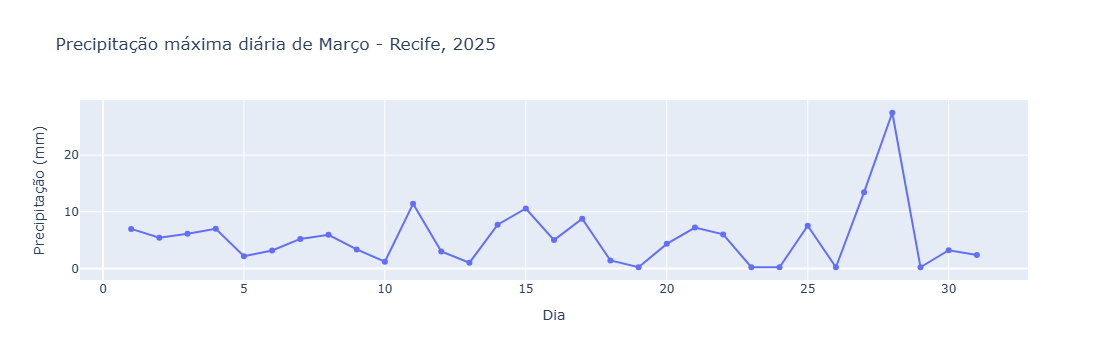

In [20]:
#Variáveis 
df_diario = precipitacao.groupby('data')['valorMedida'].max()
x = list(range(1, 32))
y = df_diario

# Gráfico interativo
fig = px.line(df, x= x, y= y, markers=True, title="Precipitação máxima diária de Março - Recife, 2025")
fig.update_traces(mode="lines+markers")
fig.update_layout(
    xaxis_title="Dia",
    yaxis_title="Precipitação (mm)"
)
fig.update_traces(
    hovertemplate='Dia: %{x}<br>Chuva: %{y:.2f} mm<extra></extra>'
)

fig.show()

In [10]:
#Variáveis 
df_acumulado = df.groupby('nomeEstacao')['valorMedida'].sum()
x = df['nomeEstacao'].unique()
y = df_acumulado

# Gráfico interativo
fig = px.line(df, x= x, y= y, markers=True, title="Precipitação acumulada registrada nos pluviômetros de Março - Recife, 2025")
fig.update_traces(mode="lines+markers")
fig.update_layout(
    xaxis_title="Estação Pluviométrica",
    yaxis_title="Precipitação (mm)"
)
fig.update_traces(
    hovertemplate='Pluviômetro: %{x}<br>Chuva: %{y:.2f} mm<extra></extra>'
)

fig.show()

- Estatísticas descritivas da precipitação

Diária

In [12]:
df_diario.describe().round(2)

count    31.00
mean      5.41
std       5.40
min       0.20
25%       1.78
50%       5.00
75%       7.09
max      27.48
Name: valorMedida, dtype: float64

Acumulado do mês

In [13]:
df_acumulado.describe().round(2)

count     16.00
mean     154.39
std      100.04
min        0.00
25%       60.84
50%      165.25
75%      206.65
max      303.53
Name: valorMedida, dtype: float64